# How to use Google Colab
#  

### MNIST, Convolutional Neural Network (CNN)

### Step - 3

### MNIST由手寫阿拉伯數字組成，包含60,000個訓練樣本和10,000個測試樣本。

##### data from: https://keras.io/datasets/#mnist-database-of-handwritten-digits
##### code modified from: TensorFlow+Keras[深度學習]人工智慧實務應用 / 林大貴


# (1) Import the data from Keras

In [1]:
from keras.utils import np_utils
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.random.seed(3)

In [2]:
# read in the file
import keras
import tensorflow as tf 

tf.keras.datasets.mnist.load_data(path="mnist.npz")
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


# (2) View the first 10 images and labels

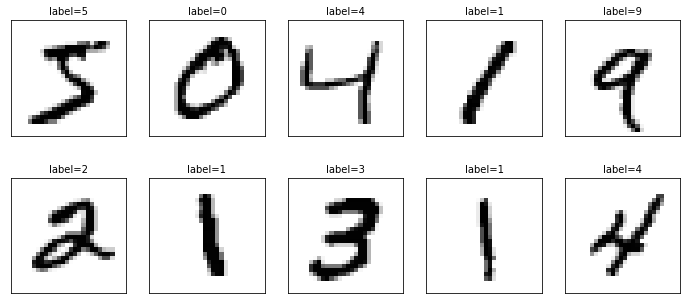

In [3]:
fig = plt.gcf()
fig.set_size_inches(12,14)

for i in range(0,10):
    ax=plt.subplot(5,5,1+i)
    ax.imshow(x_train[i], cmap='binary')
    title= "label=" +str(y_train[i])
    ax.set_title(title,fontsize=10) 
    ax.set_xticks([]);ax.set_yticks([])        
plt.show()

# (3) Convert 2-D image to nx28x28x1 array, normalize the numbers

In [4]:
# convert 2-D 28x28 image to 4-D nx28x28x1  array

x_Train4D=x_train.reshape(x_train.shape[0],28,28,1).astype('float32')
x_Test4D=x_test.reshape(x_test.shape[0],28,28,1).astype('float32')

In [5]:
# normalize the image numbers to 0~1

x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255
print(x_Train4D_normalize.shape)
print(x_Test4D_normalize.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


# (4) Convert label number to one-hot encoding

In [6]:
# convert label numbers to one-hot encoding

y_TrainOneHot = np_utils.to_categorical(y_train)
y_TestOneHot = np_utils.to_categorical(y_test)
print(y_TrainOneHot.shape)
print(y_TestOneHot.shape)

(60000, 10)
(10000, 10)


# (5) Use a Convolutional Neural Network

In [7]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [8]:
model = Sequential()

In [9]:
model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1), 
                 activation='relu'))

In [10]:
# Enable this cell in the second step

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [11]:
model.add(Flatten())

In [12]:
# Enable this cell in the second step

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

In [13]:
model.add(Dense(10,activation='softmax'))

In [14]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 36)        14436     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 36)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 36)          0         
                                                                 
 flatten (Flatten)           (None, 1764)              0

# (6) Model training

In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy']) 

In [16]:
train_history=model.fit(x=x_Train4D_normalize, 
                        y=y_TrainOneHot,validation_split=0.2, 
                        epochs=50, batch_size=300,verbose=2)

Epoch 1/50
160/160 - 14s - loss: 0.5013 - accuracy: 0.8433 - val_loss: 0.1106 - val_accuracy: 0.9663 - 14s/epoch - 89ms/step
Epoch 2/50
160/160 - 13s - loss: 0.1476 - accuracy: 0.9561 - val_loss: 0.0676 - val_accuracy: 0.9800 - 13s/epoch - 82ms/step
Epoch 3/50
160/160 - 13s - loss: 0.1042 - accuracy: 0.9691 - val_loss: 0.0604 - val_accuracy: 0.9824 - 13s/epoch - 84ms/step
Epoch 4/50
160/160 - 14s - loss: 0.0862 - accuracy: 0.9741 - val_loss: 0.0472 - val_accuracy: 0.9859 - 14s/epoch - 86ms/step
Epoch 5/50
160/160 - 13s - loss: 0.0729 - accuracy: 0.9789 - val_loss: 0.0448 - val_accuracy: 0.9875 - 13s/epoch - 82ms/step
Epoch 6/50
160/160 - 13s - loss: 0.0621 - accuracy: 0.9812 - val_loss: 0.0389 - val_accuracy: 0.9890 - 13s/epoch - 81ms/step
Epoch 7/50
160/160 - 13s - loss: 0.0555 - accuracy: 0.9832 - val_loss: 0.0396 - val_accuracy: 0.9893 - 13s/epoch - 83ms/step
Epoch 8/50
160/160 - 13s - loss: 0.0521 - accuracy: 0.9845 - val_loss: 0.0371 - val_accuracy: 0.9908 - 13s/epoch - 83ms/step


# (7) Training history

In [17]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

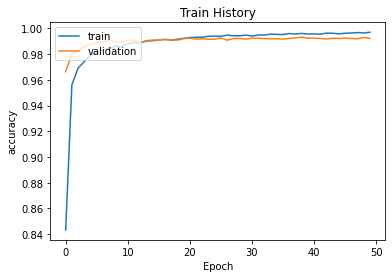

In [18]:
show_train_history(train_history,'accuracy','val_accuracy')

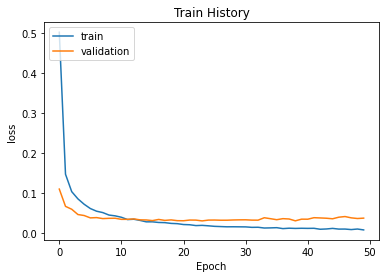

In [19]:
show_train_history(train_history,'loss','val_loss')

# (8) Accuracy

In [20]:
scores = model.evaluate(x_Test4D_normalize, y_TestOneHot)
print()
print('accuracy=',scores[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0269 - accuracy: 0.9940

accuracy= 0.9940000176429749


# (9) Prediction

In [21]:
predictions = (model.predict(x_test) > 0.5).astype("int32")

In [22]:
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

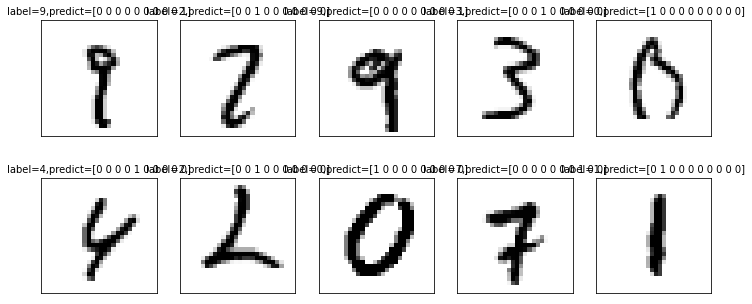

In [24]:
plot_images_labels_prediction(x_test,y_test,
                              predictions,idx=320)

# (10) Confusion matrix

In [25]:
# save and load weights
model.save_weights('my_model_weights.h5')
model.load_weights('my_model_weights.h5')

In [26]:
model.save('my_model.h5')  
del model  # deletes the existing model

from keras.models import load_model
model = load_model('my_model.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 36)        14436     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 36)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 36)          0         
                                                                 
 flatten (Flatten)           (None, 1764)              0